#Data 01: 스타워즈(Starwars)

*   스타워즈 API([SWAP](https://swapi.dev/)) 의 데이터로 스타워즈에 등장하는 캐릭터들의 특징을 나타내고 있다.
*   Data from: https://dplyr.tidyverse.org/reference/starwars.html



##1.데이터 둘러보기

In [ ]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 폰트 가져오기

plt.style.use('seaborn') #그래프 기본 설정
sns.set(font_scale=1)

import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기
#구글 드라이브에 올려준 csv 데이터 파일 불러오기
sw = pd.read_csv('/content/drive/MyDrive/Python/01_Starwars/Starwars.csv')

In [ ]:
#불러온 데이터 일단 확인하기
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


<컬럼 설명>   
* name: 캐릭터 이름  
* height: 키  
* mass: 몸무게  
* hair_color: 머리카락 색  
* skin_color: 피부색  
* eye_color: 눈동자 색  
* birth_year: 생년  
* sex: 생물학적 성별  
* gender: 사회적 성별  
* homeworld: 고향  
* species: 종

* 범주형 변수: *빈도frequency 계산 가능*
               name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               height, mass, birth_year

In [ ]:
#컬럼 기본 정보 확인하기
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [ ]:
#연속형(수치) 데이터의 통계치 확인하기
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [ ]:
#범주형 데이터의 통계치 확인하기
sw.describe(include=np.object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Jek Tono Porkins,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [ ]:
#범주형 데이터 컬럼 안에는 어떤 내용이 들어있을까?
print('Hair colour: ', sw['hair_color'].unique())
print('Skin colour: ', sw['skin_color'].unique())
print('Eye colour: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())
#범주가 적으면 범주 별 그래프를 그리기 쉽다
#이 데이터에서는 sex, gender!

Hair colour:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin colour:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye colour:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Mala

In [ ]:
#데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", sw.shape[0]*sw.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("스타워즈에 등장하는 등장인물 수: ", sw['name'].nunique())
print("스타워즈에 등장하는 종족 수: ", sw['species'].nunique())

총 데이터 개수:  957
총 결측치 수: 105 = 전체 데이터의 10.97% 
스타워즈에 등장하는 등장인물 수:  87
스타워즈에 등장하는 종족 수:  37


##2.데이터를 보고 질문 만들기
* 스타워즈 캐릭터의 성별 비율은?
* 성별에 따른 캐릭터 신장의 분포는?
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
* 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?

##3.데이터 정비하기

###3-1.결측치 처리하기

In [ ]:
#NULL이 존재하는 컬럼 확인하기 
sw.isnull().any(axis=0)
#height, mass, type, x, y 컬럼에 NaN 존재한다

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [ ]:
#컬럼별로 NULL 개수 확인하기
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [ ]:
#어떤 컬럼의 결측치를 처리할것인가?
#hair color, sex, gender, homeworld, species의 경우 개인 특성이므로 다른 값을 넣어주는 것이 의미가 없다
#height, mass에서는 결측치를 0으로 처리해보자
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [ ]:
#sex에 none도 있고 NaN도 있다? 
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color  ...   sex     gender  homeworld species
1    C-3PO   167.0   75.0        NaN  ...  none  masculine   Tatooine   Droid
2    R2-D2    96.0   32.0        NaN  ...  none  masculine      Naboo   Droid
7    R5-D4    97.0   32.0        NaN  ...  none  masculine   Tatooine   Droid
21   IG-88   200.0  140.0       none  ...  none  masculine        NaN   Droid
72  R4-P17    96.0    NaN       none  ...  none   feminine        NaN   Droid
84     BB8     NaN    NaN       none  ...  none  masculine        NaN   Droid

[6 rows x 11 columns]
              name  height  mass hair_color  ...  sex gender  homeworld species
36        Ric Oli?   183.0   NaN      brown  ...  NaN    NaN      Naboo     NaN
39   Quarsh Panaka   183.0   NaN      black  ...  NaN    NaN      Naboo     NaN
79       Sly Moore   178.0  48.0       none  ...  NaN    NaN     Umbara     NaN
85  Captain Phasma     NaN   NaN    unknown  ...  NaN    NaN        NaN     NaN

[4 rows x 11 columns]


In [ ]:
#sex = none 인 것들은 species = Droid이므로, 컬럼 내용을 바꿔보자
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##4.EDA & Visualization

###4-1. 스타워즈 캐릭터의 성별 비율

In [ ]:
#스타워즈 캐릭터의 성비(sex, gender)는?
sw['sex'].value_counts()
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

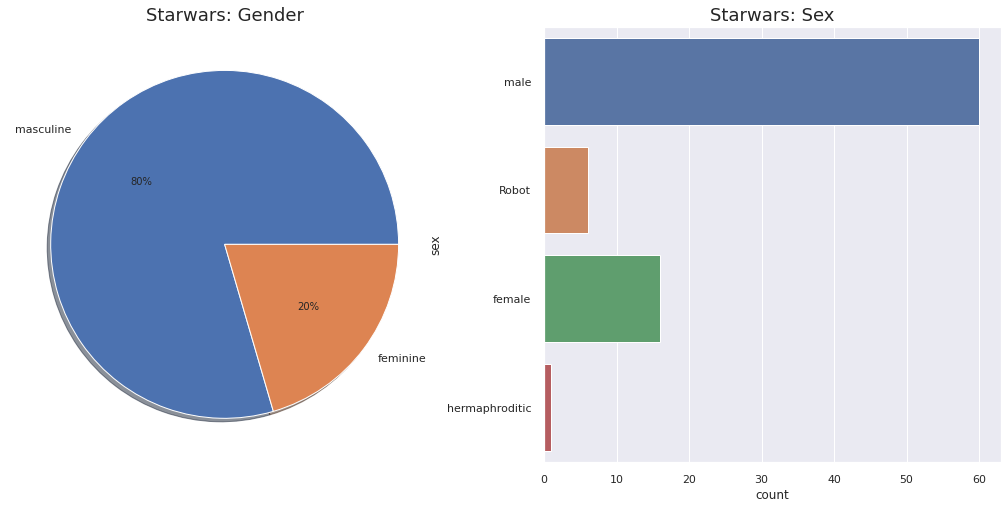

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #그래프 틀 정하기

sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True) #파이그래프 그리기
ax[0].set_title('Starwars: Gender', size=18) #그래프 제목
ax[0].set_ylabel('') #y 라벨 없애기

#sns.countplot
#항목별 갯수를 세어주는 countplot
#알아서 해당 column을 구성하고 있는 value들을 구분하여 보여준다.
# 차트 가로로 그리기 : x를 y로 변경하면 세로에서 가로 차트로 변경 가능
sns.countplot(y='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18) #그래프 제목

plt.show()

###4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [ ]:
#스타워즈 캐릭터의 신장 확인하기
#연속형(수치) 데이터의 통계치 확인하기: 최솟값과 최댓값
sw['height'].describe()

count     81.000000
mean     174.358025
std       34.770429
min       66.000000
25%      167.000000
50%      180.000000
75%      191.000000
max      264.000000
Name: height, dtype: float64

In [ ]:
#skewness and kurtosis 구하기
#Skewness(왜도): 데이터가 정규분포에서 한 쪽으로 치우쳐있는가?
#                -3 < skewness < 3 사이의 값이면 기준에 부합한다
#Kurtosis(첨도): 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가)?
#               : 정규분포의 kurtosis = 0
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.064592
Kurtosis: 2.096965


In [ ]:
#자웅동체(hermaphroditic) 캐릭터(Jabba Desilijic Tiure)는 하나 뿐이므로 확률분포를 구하는것이 불가능!
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


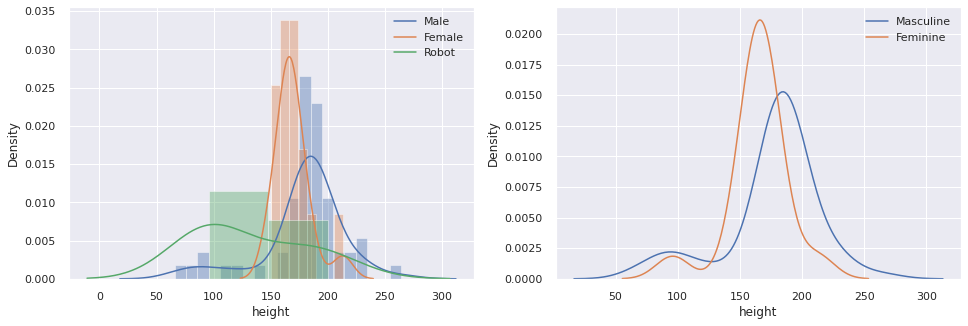

In [ ]:
#성별에 따른 스타워즈 캐릭터의 신장 분포 그래프
#자웅동체 캐릭터(Jabba Desilijic Tiure)는 하나 뿐이므로 확률분포를 구하는것이 불가능!

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['Male','Female','Robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['Masculine','Feminine'])

plt.show()

###4-3. 가장 가벼운 캐릭터와 가장 무거운 캐릭터

In [ ]:
#몸무게가 가장 가벼운 캐릭터
notz = sw[sw['mass'] != 0]  #몸무게가 0인 것은 제외하자!
min(notz['mass'])

15.0

In [ ]:
#데이터 내용 정리해서 출력하기
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다 
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다 


###4-4.스타워즈 캐릭터의 종족 간 몸무게 비교

In [ ]:
#Groupby로 스타워즈 종족 별 평균 몸무게를 계산해보자
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,NaN
Clawdite,55.000000
Droid,69.750000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


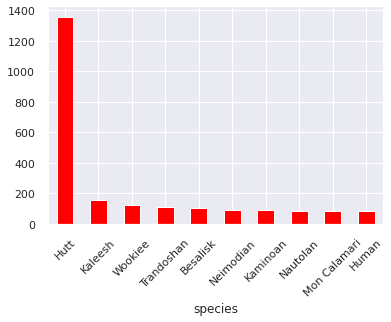

In [ ]:
#몸무게 많은 순으로 상위 10개 종족을 그래프로 그려보자
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

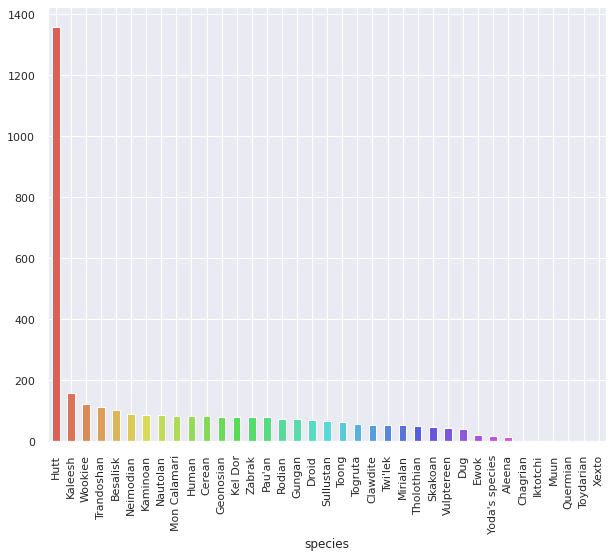

In [ ]:
#스타워즈 종족별 몸무게 많은 순으로 그래프를 그려보자
f, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = sns.color_palette('hls',len(weight['mass'])) #hls라는 컬러팔레트에서 어떤 컬러를 입혀줄지 결정

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90) #라벨이 겹쳐져서 보이니까 90도 돌려준다

plt.show()

###4-5. 스타워즈 캐릭터의 무게-키 상관관계

In [ ]:
#Hutt은 몸무게가 너무 outlier 하므로 out시키자!
#몸무게가 0인 것도 제외시키자!
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])
sw[~out1][~out2].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(58, 11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


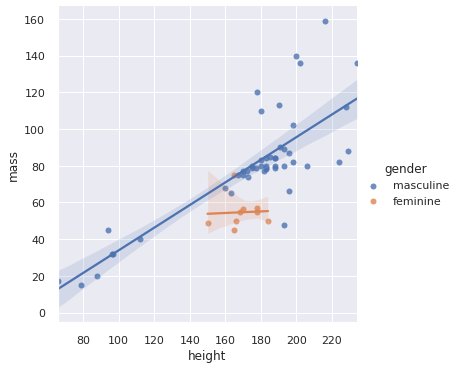

In [ ]:
#두 데이터 사이의 상관관계를 나타내주는 lmplot
#replot은 점만 나타난다

sns.lmplot(data=sw[~out1][~out2], x='height', y='mass') #hue=gender로 나타내서도 살펴보기
sns.set_style(style='darkgrid') #어두운 그리드로 배경 지정

plt.show()

##5.Review

* 스타워즈 데이터는:  
총 데이터 개수:  957  
총 결측치 수: 105 = 전체 데이터의 10.97%   
스타워즈에 등장하는 등장인물 수:  87  
스타워즈에 등장하는 종족 수:  37  

* 스타워즈 캐릭터의 성별 비율은?  
  : 남성/남성 gender를 가진 캐릭터가 80% 가량을 차지한다.
* 성별에 따른 캐릭터 신장의 분포는?  
  : 남성 캐릭터의 키가 대체로 여성보다 크며, 로봇은 그보다 키가 작다.
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?  
  : ['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다   
    ['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다 
* 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?  
  : 그렇다. 인간과 다른 행성에 사는 종족이지만, 키와 몸무게는 대체로 비례 관계를 보인다.